# Neutron Diffusion Equation Criticality Eigenvalue Calculation #


Description: Solves neutron diffusion equation (NDE) in slab geometry. Finds width of critical slab using one-speed diffusion theory with zero flux boundary conditions on the edges.

### Neutron Diffusion Equation in Slab with Fission Source ###
The NDE in a slab is given by

 $$ -\frac{d}{dx}D(x)\frac{d\phi(x)}{dx} + \Sigma_a \phi(x) = \frac{1}{k}\nu
 \Sigma_f \phi(x) $$

 where $D(x)$ is the diffusion coefficient, $\Sigma_a$ and $\Sigma_f$ are
 the absorption and fission macroscopic cross sections, $\nu$ is the
 average number of neutrons emitted in fission, and $k$ is k-effective.


### Import Python Libraries ###

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Material Properties ###

In [2]:
D = 0.9
nusigf = 0.070
siga = 0.066

### Slab Geometry Width and Discretization ###

In [3]:
Lx = np.pi*((nusigf-siga)/D)**(-0.5)

N = 50;
h = Lx/(N-1)

x = np.zeros(N)

for i in range(N-1):
    x[i+1] = x[i] + h
    

### Generation of Leakage and Absorption Matrices ###

In [4]:
L = np.zeros((N,N))
A = np.zeros((N,N))
M = np.zeros((N,N))

for i in range(N):
    L[i][i] = L[i][i] + (-2*(-D/(h**2)))
    
for i in range(1,N):
    L[i][i-1] = L[i][i-1] + (1*(-D/h**2))
    
for i in range(N-1):
    L[i][i+1] = L[i][i+1] + (1*(-D/h**2))
    
for i in range(N):
    A[i][i] = A[i][i] + siga
    
M = L + A

### Boundary Conditions $(\phi(0) = \phi(L) = 0)$ ###

In [5]:
M[0][0] = 1
M[0][1] = 0
M[N-1][N-1] = 1
M[N-1][N-2] = 0

phi0 = np.ones((N,1))
phi0[0] = 0
phi0[N-1] = 0

### Power Iteration Scheme for k-eigenvalue and Flux ###
Algorithm: We input an initial flux $\phi^{(0)}(x)$ and k-effective value $k_0$ and solve the equation:

$$ M \psi^{(0)}(x) = \frac{1}{k} F \phi^{(0)}(x) $$

for $\psi^{(0)}(x)$. Using this function, we calculate the next k-effective iterate using

$$ k^{n+1} = \frac{\sum \nu \Sigma_f \psi^{(n)}(x)}{\sum \nu \Sigma_f \phi^{(n)}(x)} $$

The new flux $\phi^{(n+1)}(x)$ is calculated

$$ \phi^{(n+1)}(x) = \frac{1}{k} \psi^{(n)}(x) $$.
 
This is done until the two-norm difference between k-effective iterations is less than some tolerance.

k-effective =  [ 1.00001957]


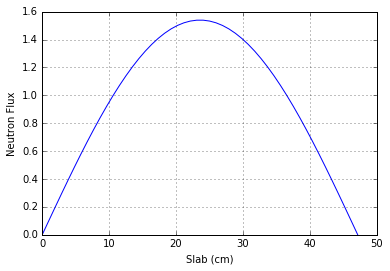

In [6]:
tol = 1e-15
k = 1.00

for i in range(100):
    
    kold = k
    psi = np.linalg.solve(M,nusigf*phi0)
    
    k = sum(nusigf*psi)/sum(nusigf*phi0)
    phi0 = (1/k)*psi
    phi0[0] = 0
    phi0[N-1] = 0
    
    residual = np.abs(k-kold)
    
    if residual <= tol:
        break
        
plt.plot(x,phi0)
plt.xlabel('Slab (cm)')
plt.ylabel('Neutron Flux')
plt.grid()

print "k-effective = ", k